# FVCOM Grid Node Checker Demo
**Author: Jun Sasaki | Created: 2025-01-14**

**Purpose:** Visualize FVCOM grid nodes with various display options

This notebook demonstrates how to:
- Display FVCOM mesh over tile maps or white background
- Show node markers at all nodes
- Display node numbers (one-based FVCOM convention)
- Highlight specific nodes of interest
- Combine different visualization options

## Setup and Imports

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import GoogleTiles, OSM

# Add parent directory to path to import node_checker
sys.path.insert(0, str(Path.cwd().parent))
from node_checker import plot_node_checker, check_nodes_in_bounds

# Create output directory for saved figures
output_dir = Path("PNG")
output_dir.mkdir(exist_ok=True)

print("Setup complete!")

Setup complete!


## 1. Define Grid File Path
Modify this path to point to your FVCOM grid file

In [2]:
# Define path to your grid file
grid_file = Path("~/Github/TB-FVCOM/goto2023/input/TokyoBay18_grd.dat").expanduser()

# UTM zone for Tokyo Bay (adjust for your region)
utm_zone = 54

# Check if file exists
if grid_file.exists():
    print(f"✓ Grid file found: {grid_file}")
    print(f"  File size: {grid_file.stat().st_size / 1024:.1f} KB")
else:
    print(f"✗ Grid file not found: {grid_file}")
    print("  Please update the path to your FVCOM grid file")

✓ Grid file found: /home/pj24001722/ku40000343/Github/TB-FVCOM/goto2023/input/TokyoBay18_grd.dat
  File size: 265.8 KB


## 2. Basic Mesh Display
Display the mesh triangulation only

Figure saved to: PNG/mesh_only.png


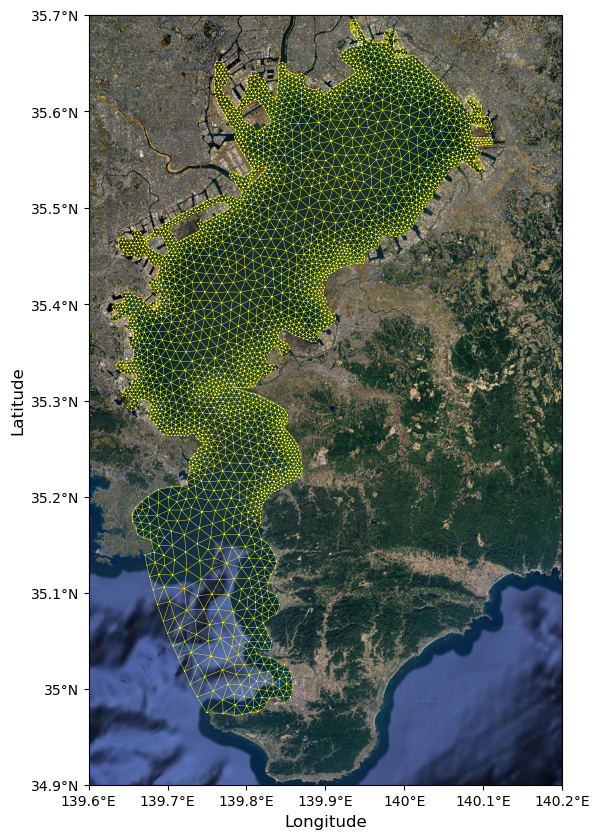

Mesh visualization saved to PNG/mesh_only.png


In [3]:
# Display mesh over satellite imagery
fig, ax = plot_node_checker(
    grid_file,
    utm_zone=utm_zone,
    background="tiles",
    tile_provider=GoogleTiles(style="satellite"),
    show_mesh=True,
    show_all_nodes=False,
    mesh_color="yellow",
    mesh_linewidth=0.3,
    title="FVCOM Mesh - Tokyo Bay",
    figsize=(12, 10),
    save_path=output_dir / "mesh_only.png",
)
plt.show()
print("Mesh visualization saved to PNG/mesh_only.png")

## 3. Display All Nodes
Show markers at all node positions

Figure saved to: PNG/all_nodes_markers.png


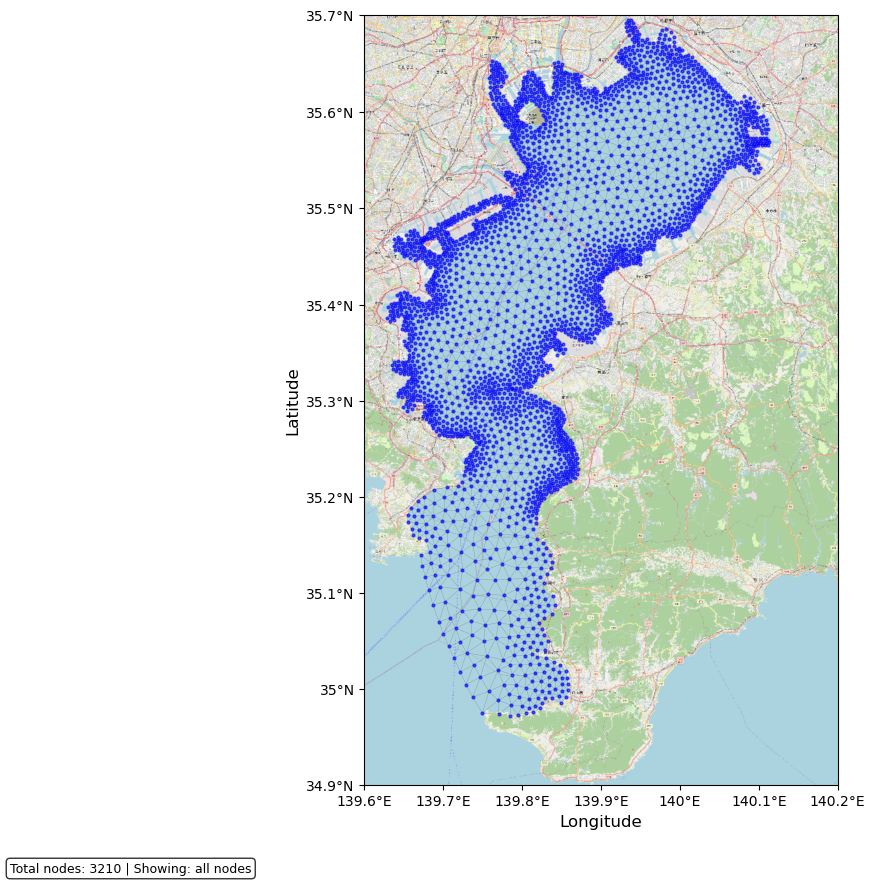

All nodes visualization saved to PNG/all_nodes_markers.png


In [4]:
# Display all nodes with markers (no numbers)
fig, ax = plot_node_checker(
    grid_file,
    utm_zone=utm_zone,
    background="tiles",
    tile_provider=OSM(),  # OpenStreetMap tiles
    show_mesh=True,
    show_all_nodes=True,
    show_node_numbers=False,  # No text labels for performance
    all_node_color="blue",
    mesh_color="#808080",
    mesh_linewidth=0.2,
    title="All Grid Nodes",
    figsize=(12, 10),
    save_path=output_dir / "all_nodes_markers.png",
)
plt.show()
print("All nodes visualization saved to PNG/all_nodes_markers.png")

## 4. Display All Nodes with Numbers
**IMPORTANT**: Show ALL node numbers to identify specific nodes. Overlapping text is expected - zoom in later to read specific areas.

Figure saved to: PNG/all_nodes_with_numbers.png


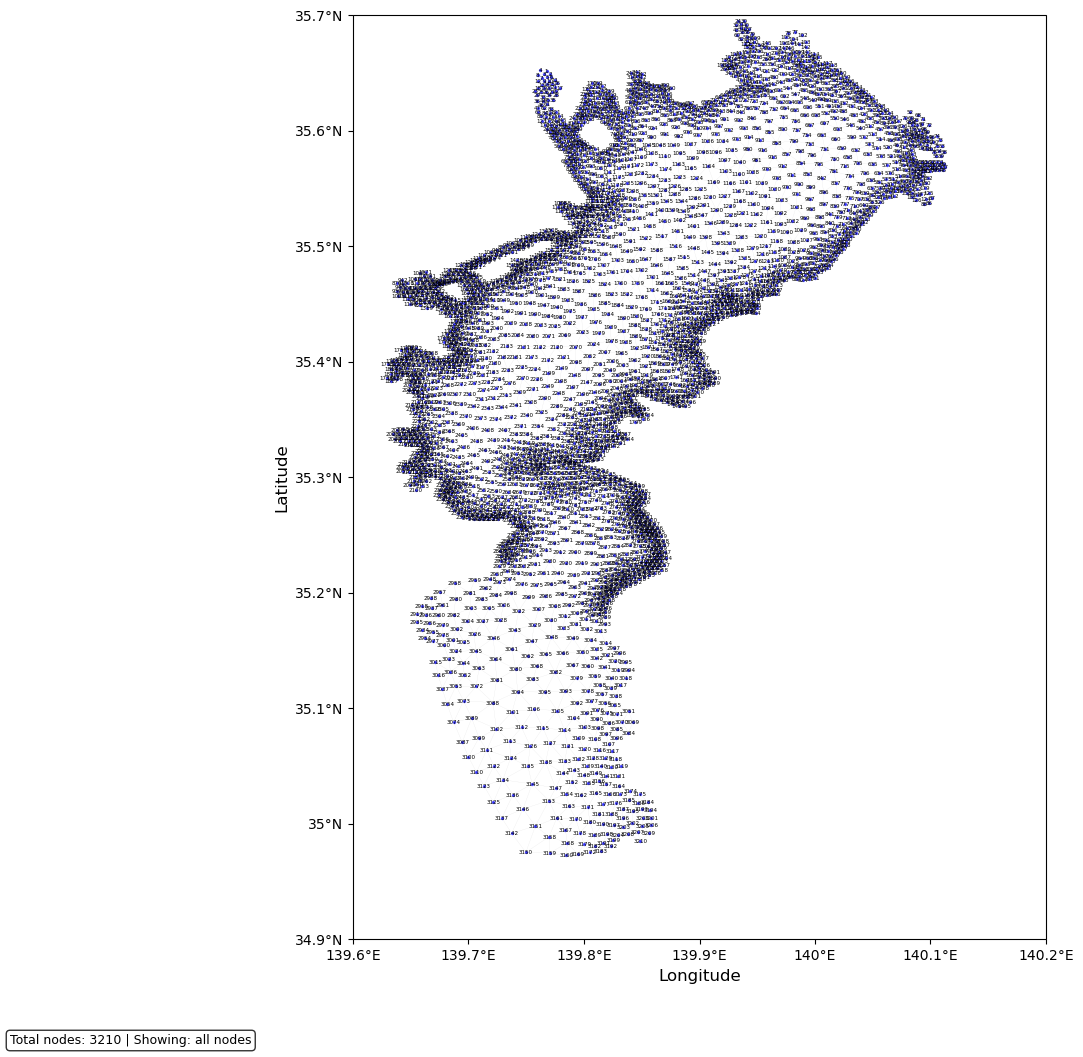

All nodes with numbers saved to PNG/all_nodes_with_numbers.png
TIP: Text overlap is expected. Save the image and zoom in to identify specific node numbers.


In [5]:
# Display ALL nodes with their numbers (simple text, no decoration)
# Note: Text will overlap - this is expected. Zoom in to read specific areas.
fig, ax = plot_node_checker(
    grid_file,
    utm_zone=utm_zone,
    background="white",  # White background for clarity
    show_mesh=True,
    show_all_nodes=True,
    show_node_numbers=True,  # Show ALL node numbers
    all_node_color="blue",
    mesh_color="lightgray",
    mesh_linewidth=0.1,
    title="All Nodes with Numbers (Zoom in to read specific areas)",
    figsize=(14, 12),
    save_path=output_dir / "all_nodes_with_numbers.png",
)
plt.show()
print("All nodes with numbers saved to PNG/all_nodes_with_numbers.png")
print("TIP: Text overlap is expected. Save the image and zoom in to identify specific node numbers.")

## 5. Zoomed View with Readable Node Numbers
Display a zoomed area where node numbers are clearly readable

## 5. Zoomed View with Readable Node Numbers
Display a zoomed area where node numbers are clearly readable

## 6. Highlight Specific Nodes
Mark and label specific nodes of interest

Valid nodes: [100, 200, 300, 500, 1000, 1500, 2000, 2500, 3000]
Figure saved to: PNG/specific_nodes.png


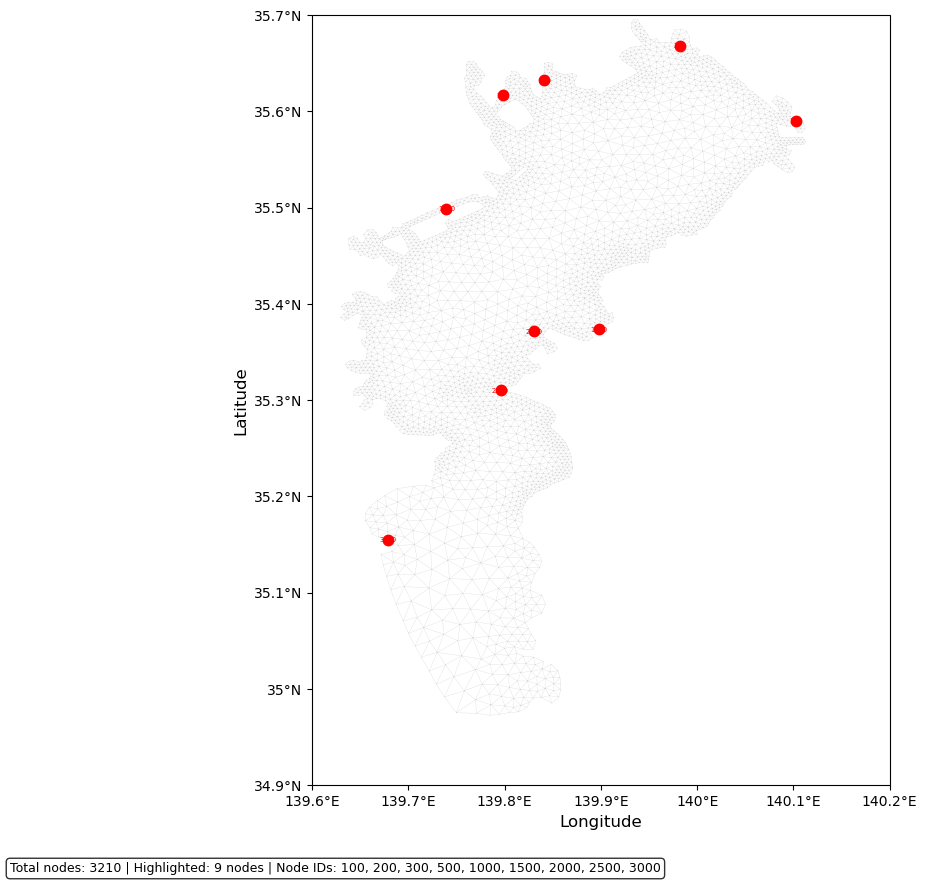

Specific nodes visualization saved to PNG/specific_nodes.png


In [6]:
# Define nodes of interest (one-based node numbers)
nodes_of_interest = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 3000]

# Check if nodes are valid
node_info = check_nodes_in_bounds(grid_file, nodes_of_interest, utm_zone)
print(f"Valid nodes: {node_info['valid_nodes']}")
if node_info['invalid_nodes']:
    print(f"Invalid nodes (out of range): {node_info['invalid_nodes']}")

# Plot with specific nodes highlighted
fig, ax = plot_node_checker(
    grid_file,
    utm_zone=utm_zone,
    background="white",  # White background
    show_mesh=True,
    show_all_nodes=False,  # Don't show all nodes
    specific_nodes=node_info['valid_nodes'],
    show_node_numbers=True,
    specific_node_color="red",
    mesh_color="lightgray",
    mesh_linewidth=0.2,
    title="Specific Nodes Highlighted",
    figsize=(12, 10),
    save_path=output_dir / "specific_nodes.png",
)
plt.show()
print("Specific nodes visualization saved to PNG/specific_nodes.png")

## 7. Combined Visualization
Show all nodes with specific nodes highlighted

Figure saved to: PNG/combined_view.png


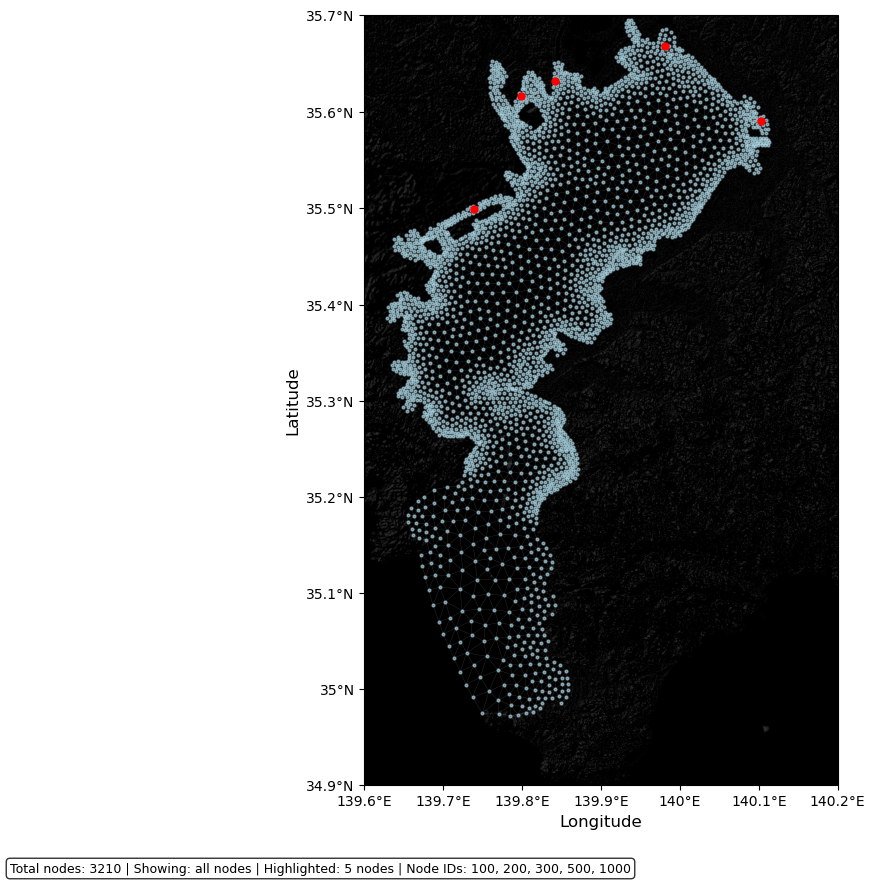

Combined visualization saved to PNG/combined_view.png


In [7]:
# Combine all nodes (blue) with highlighted specific nodes (red)
fig, ax = plot_node_checker(
    grid_file,
    utm_zone=utm_zone,
    background="tiles",
    tile_provider=GoogleTiles(style="terrain"),
    show_mesh=True,
    show_all_nodes=True,
    show_node_numbers=False,  # No numbers for all nodes
    all_node_color="lightblue",
    specific_nodes=nodes_of_interest[:5],  # Highlight first 5 nodes
    specific_node_color="red",
    mesh_color="gray",
    mesh_linewidth=0.1,
    title="All Nodes with Highlighted Selection",
    figsize=(12, 10),
    save_path=output_dir / "combined_view.png",
)
plt.show()
print("Combined visualization saved to PNG/combined_view.png")

## 8. Interactive Node Selection
Enter node numbers to visualize interactively

Enter node numbers to visualize (comma-separated):
Example: 150,250,350,450,550

Trying example nodes...


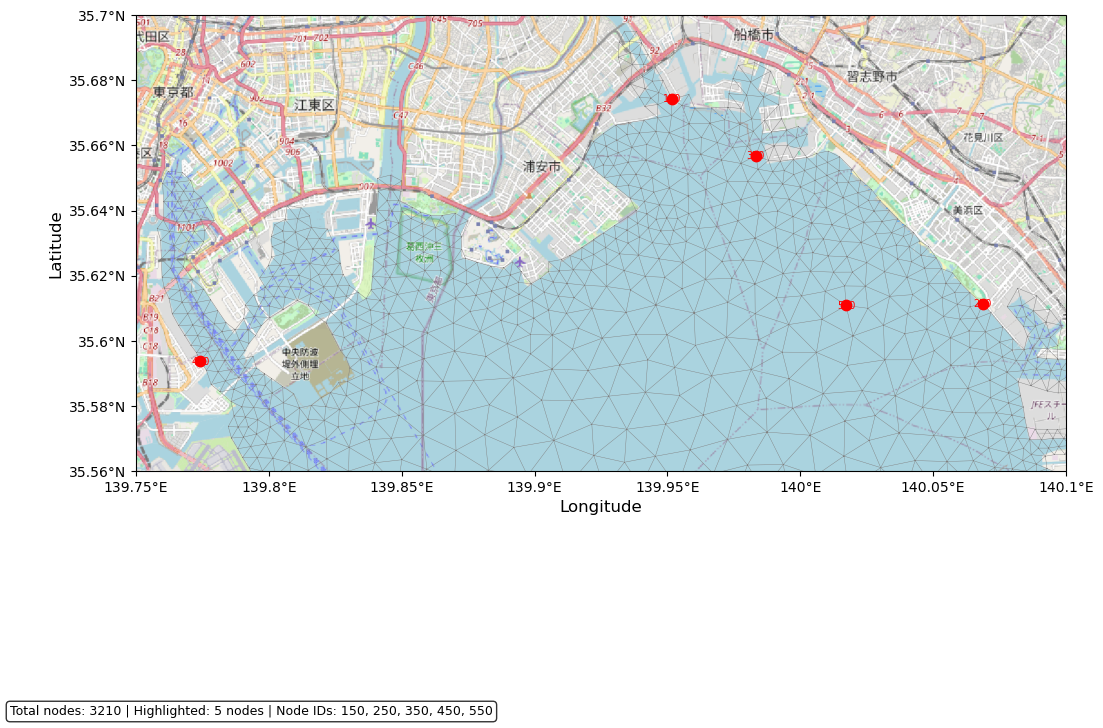


Node Coordinates:
  Node 150: (139.951740, 35.674230)
  Node 250: (140.068623, 35.611421)
  Node 350: (139.983276, 35.656866)
  Node 450: (139.774257, 35.593702)
  Node 550: (140.017237, 35.610835)


In [8]:
# Interactive node selection
def plot_selected_nodes(node_string, zoom=False):
    """Plot nodes from comma-separated string"""
    try:
        # Parse node numbers
        nodes = [int(n.strip()) for n in node_string.split(',')]
        
        # Check validity
        info = check_nodes_in_bounds(grid_file, nodes, utm_zone)
        
        if info['valid_nodes']:
            # Calculate bounds if zooming
            xlim_zoom = None
            ylim_zoom = None
            if zoom and info['node_info']:
                lons = [info['node_info'][n]['lon'] for n in info['valid_nodes']]
                lats = [info['node_info'][n]['lat'] for n in info['valid_nodes']]
                padding = 0.02  # Add padding around nodes
                xlim_zoom = (min(lons) - padding, max(lons) + padding)
                ylim_zoom = (min(lats) - padding, max(lats) + padding)
            
            # Create plot
            fig, ax = plot_node_checker(
                grid_file,
                utm_zone=utm_zone,
                background="tiles",
                show_mesh=True,
                specific_nodes=info['valid_nodes'],
                show_node_numbers=True,
                xlim=xlim_zoom,
                ylim=ylim_zoom,
                title=f"Selected Nodes: {', '.join(map(str, info['valid_nodes']))}",
            )
            plt.show()
            
            # Print coordinates
            print("\nNode Coordinates:")
            for n in info['valid_nodes']:
                coord = info['node_info'][n]
                print(f"  Node {n}: ({coord['lon']:.6f}, {coord['lat']:.6f})")
        
        if info['invalid_nodes']:
            print(f"\nInvalid nodes: {info['invalid_nodes']}")
            
    except ValueError as e:
        print(f"Error parsing node numbers: {e}")
        print("Please enter comma-separated integers (e.g., 100,200,300)")

# Example usage
print("Enter node numbers to visualize (comma-separated):")
print("Example: 150,250,350,450,550")
print("\nTrying example nodes...")
plot_selected_nodes("150,250,350,450,550", zoom=True)

## 9. Boundary and Corner Nodes
Visualize boundary nodes or corner nodes of the domain

## 10. Export Node Information
Export node coordinates to CSV for external use

## 10. Export Node Information
Export node coordinates to CSV for external use

Approximate corner/extreme nodes: [np.int64(3160), np.int64(1754), np.int64(37), np.int64(30)]
Figure saved to: PNG/corner_nodes.png


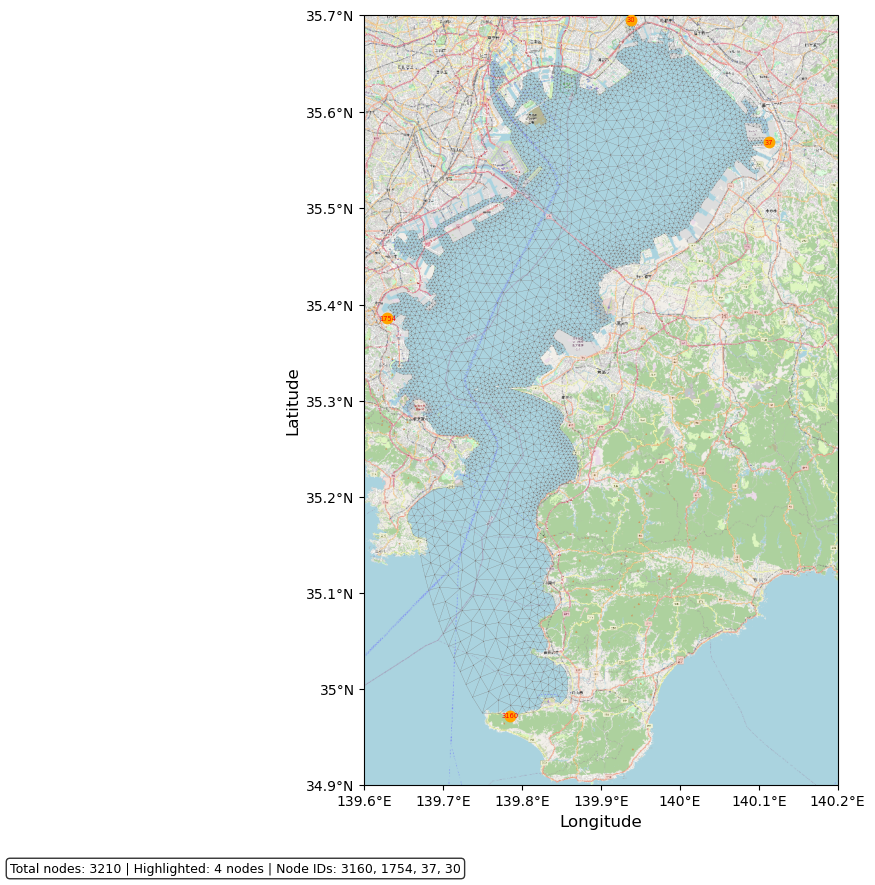

Corner nodes visualization saved to PNG/corner_nodes.png


In [9]:
# Find approximate corner nodes by looking at extreme coordinates
from xfvcom import FvcomInputLoader

# Load grid to get node coordinates
loader = FvcomInputLoader(
    grid_path=grid_file,
    utm_zone=utm_zone,
    add_dummy_time=False,
    add_dummy_siglay=False
)
grid_ds = loader.ds

# Find corner nodes (approximately)
lon_vals = grid_ds.lon.values
lat_vals = grid_ds.lat.values

# Find nodes at corners
corner_nodes = [
    lon_vals.argmin() + 1,  # Westernmost
    lon_vals.argmax() + 1,  # Easternmost  
    lat_vals.argmin() + 1,  # Southernmost
    lat_vals.argmax() + 1,  # Northernmost
]

# Remove duplicates
corner_nodes = list(set(corner_nodes))

print(f"Approximate corner/extreme nodes: {corner_nodes}")

# Plot corner nodes
fig, ax = plot_node_checker(
    grid_file,
    utm_zone=utm_zone,
    background="tiles",
    show_mesh=True,
    specific_nodes=corner_nodes,
    show_node_numbers=True,
    specific_node_color="orange",
    mesh_color="gray",
    mesh_linewidth=0.2,
    title="Domain Extreme Nodes",
    figsize=(12, 10),
    save_path=output_dir / "corner_nodes.png",
)
plt.show()
print("Corner nodes visualization saved to PNG/corner_nodes.png")

In [10]:
import pandas as pd

# Create DataFrame with all node information
n_nodes = len(grid_ds.lon)
node_data = {
    'node_id': range(1, n_nodes + 1),  # One-based numbering
    'lon': grid_ds.lon.values,
    'lat': grid_ds.lat.values,
}

# Add x,y coordinates if available
if 'x' in grid_ds:
    node_data['x'] = grid_ds.x.values
    node_data['y'] = grid_ds.y.values

df_nodes = pd.DataFrame(node_data)

# Display first few rows
print("Sample node data:")
print(df_nodes.head(10))

# Save to CSV
csv_path = output_dir / "node_coordinates.csv"
df_nodes.to_csv(csv_path, index=False)
print(f"\nNode coordinates exported to: {csv_path}")

# Summary statistics
print(f"\nGrid statistics:")
print(f"  Total nodes: {n_nodes}")
print(f"  Longitude range: {lon_vals.min():.4f} to {lon_vals.max():.4f}")
print(f"  Latitude range: {lat_vals.min():.4f} to {lat_vals.max():.4f}")

Sample node data:
   node_id         lon        lat              x             y
0        1  139.767538  35.651646  388431.892140  3.946011e+06
1        2  139.770648  35.649214  388710.063711  3.945738e+06
2        3  139.765376  35.648687  388232.045651  3.945686e+06
3        4  139.762124  35.652102  387942.404455  3.946068e+06
4        5  139.767925  35.645961  388459.023038  3.945380e+06
5        6  139.771849  35.645962  388814.285687  3.945376e+06
6        7  139.763431  35.645655  388051.729385  3.945352e+06
7        8  139.760011  35.648412  387745.954045  3.945661e+06
8        9  139.765722  35.642808  388255.182294  3.945033e+06
9       10  139.770036  35.643094  388646.164735  3.945060e+06

Node coordinates exported to: PNG/node_coordinates.csv

Grid statistics:
  Total nodes: 3210
  Longitude range: 139.6292 to 140.1125
  Latitude range: 34.9724 to 35.6950


## Summary

This notebook demonstrated the FVCOM grid node checker functionality:

1. **Basic mesh display** - Visualize the triangular mesh structure
2. **All nodes visualization** - Show markers at all node positions
3. **Node numbering** - Display one-based node numbers (FVCOM convention)
4. **Specific node highlighting** - Mark and label nodes of interest
5. **Combined views** - Layer different visualization elements
6. **Interactive selection** - Dynamically visualize selected nodes
7. **Export capabilities** - Save node information for external use

### Key Features:
- **Performance optimization**: `respect_bounds=True` only renders visible nodes
- **Automatic sizing**: Marker and font sizes adjust based on node density
- **Flexible backgrounds**: Tile maps, white, or transparent backgrounds
- **One-based indexing**: Follows FVCOM convention for node numbering

### Use Cases:
- Verify grid structure and node positions
- Identify specific nodes for boundary conditions
- Debug mesh-related issues
- Create publication-quality figures
- Export node data for external analysis